# Logistic Regression

Output variable -> y

y -> Whether the client has subscribed a term deposit or not 

Binomial ("yes" or "no")


In [16]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## EDA

In [17]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\logistic assignment

15-01-2023  18:46    <DIR>          .
15-01-2023  18:46    <DIR>          ..
13-01-2023  17:33    <DIR>          .ipynb_checkpoints
15-01-2023  18:46            91,014 Assignment no. 6.ipynb
02-01-2023  15:24         4,610,346 bank-full.csv
12-12-2022  14:10             1,803 logistic text.txt
12-12-2022  14:09               108 Problem-Statement(Bank_data).txt
               4 File(s)      4,703,271 bytes
               3 Dir(s)  129,451,450,368 bytes free


In [52]:
# Reading the csv file
Bank = pd.read_csv('bank-full.csv',sep = ';')
Bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [53]:
np.unique(Bank['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [54]:
# shape of file
Bank.shape

(45211, 17)

In [55]:
# Value count
Bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [56]:
# Checking null values
Bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [57]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [58]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Customizing hot encoding to the data

In [59]:
Bank = pd.get_dummies(Bank,columns=['job','marital','education','contact','poutcome','month'])
Bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


## Customizing binary encoding to the data

In [60]:
Bank['default']=np.where(Bank['default'].str.contains('yes'),1,0)
Bank['housing']=np.where(Bank['housing'].str.contains('yes'),1,0)
Bank['loan']=np.where(Bank['loan'].str.contains('yes'),1,0)
Bank['y']=np.where(Bank['y'].str.contains('yes'),1,0)
Bank

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

## Naming target and features

In [62]:
# locating features in file

X=pd.concat([Bank.iloc[:,0:10],Bank.iloc[:,11:-1]],axis=1)
X.head(10)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
5,35,0,231,1,0,5,139,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
6,28,0,447,1,1,5,217,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
7,42,1,2,1,0,5,380,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
8,58,0,121,1,0,5,50,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
9,43,0,593,1,0,5,55,1,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  job_admin.           45211 non-null  uint8
 11  job_blue-collar      45211 non-null  uint8
 12  job_entrepreneur     45211 non-null  uint8
 13  job_housemaid        45211 non-null  uint8
 14  job_management       45211 non-null  uint8
 15  job_retired          45211 non-null  uint8
 16  job_self-employed    4

In [64]:
# locating target variable
Y = Bank.iloc[:,10]
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int32

In [65]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: y
Non-Null Count  Dtype
--------------  -----
45211 non-null  int32
dtypes: int32(1)
memory usage: 176.7 KB


## Splitting training and testing data

In [66]:
# from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

## Fitting and predicting the model

In [67]:
# Fitting the model with training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [68]:
# Predicting the model with testing data
x_pred = classifier.predict(X_test)
x_pred

array([0, 0, 0, ..., 0, 0, 0])

## Accuracy

In [69]:
# Calculating the accuracy by using prediction values
acc = accuracy_score(x_pred,Y_test)
print('Accuracy =',acc)
print(classification_report(x_pred,Y_test))

Accuracy = 0.8914879356568365
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     14242
           1       0.23      0.59      0.33       678

    accuracy                           0.89     14920
   macro avg       0.60      0.75      0.64     14920
weighted avg       0.95      0.89      0.91     14920



In [70]:
# Calculating confusion matrix
print(confusion_matrix(x_pred,Y_test))

[[12899  1343]
 [  276   402]]


## Visualization

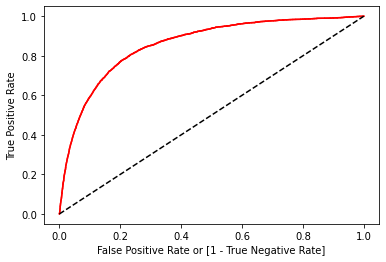

auc accuracy: 0.7493109002041823


In [71]:
fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(x_pred,Y_test)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

<AxesSubplot:xlabel='y', ylabel='count'>

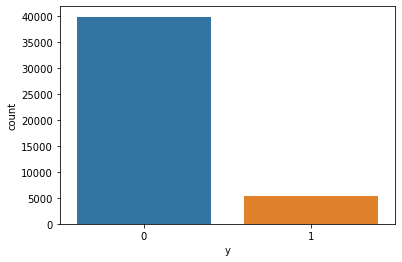

In [73]:
# Plotting countplot
import seaborn as sns
sns.countplot(Bank['y'])